<a href="https://colab.research.google.com/github/stathj/verbose-umbrella/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%88%98%EC%A7%91%EB%B0%8F%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

202084064 최현진


---

### csv - 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보
https://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do 
### API - 서울교통공사_지하철혼잡도정보
https://www.data.go.kr/data/15071311/fileData.do#tab-layer-openapi
### 웹 스크래핑으로 수집한 실시간열차운행정보 데이터 세트

를 결합해 시사점 도출하기

In [41]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
csv = pd.read_csv('서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding='cp949')

In [43]:
csv.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202305,1호선,동대문,900,25,12331,2188,9806,7379,14774,...,9301,555,2688,2,267,0,0,0,0,20230603
1,202305,1호선,동묘앞,211,2,3197,1140,3753,5206,7379,...,4201,88,1706,1,282,0,0,0,0,20230603
2,202305,1호선,서울역,708,37,8611,9912,13730,57527,43711,...,15133,2631,2693,0,228,0,0,0,0,20230603
3,202305,1호선,시청,90,3,2505,4754,4137,24662,8198,...,4344,354,933,0,25,0,0,0,0,20230603
4,202305,1호선,신설동,468,15,9034,2536,10317,8883,22069,...,9866,471,2168,1,1,0,0,0,0,20230603


In [44]:
csv.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
59403,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
59404,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
59405,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
59406,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
59407,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


In [45]:
csv.to_csv('sub.csv')

In [46]:
with open('sub.csv') as f:
  for i in range(10):
    print(f.readline(), end='')

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202305,1호선,동대문,900,25,12331,2188,9806,7379,14774,13998,20435,22506,19842,24103,18720,25631,20345,27669,24046,26474,25793,24529,27598,24164,27867,22423,27931,21611,26621,21276,24514,22067,18427,21782,16221,14909,14994,13765,11946,11492,5375,9301,555,2688,2,267,0,0,0,0,20230603
1,202305,1호선,동묘앞,211,2,3197,1140,3753,5206,7379,10573,11582,22916,10643,18105,

In [47]:
csv = pd.read_csv('sub.csv', index_col=0, low_memory=False)
csv.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202305,1호선,동대문,900,25,12331,2188,9806,7379,14774,...,9301,555,2688,2,267,0,0,0,0,20230603
1,202305,1호선,동묘앞,211,2,3197,1140,3753,5206,7379,...,4201,88,1706,1,282,0,0,0,0,20230603
2,202305,1호선,서울역,708,37,8611,9912,13730,57527,43711,...,15133,2631,2693,0,228,0,0,0,0,20230603
3,202305,1호선,시청,90,3,2505,4754,4137,24662,8198,...,4344,354,933,0,25,0,0,0,0,20230603
4,202305,1호선,신설동,468,15,9034,2536,10317,8883,22069,...,9866,471,2168,1,1,0,0,0,0,20230603


In [48]:
from numpy.lib.shape_base import column_stack
csv_recent = csv[csv['사용월']==202305]
csv_recent.drop(columns=['작업일자'])

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202305,1호선,동대문,900,25,12331,2188,9806,7379,14774,...,5375,9301,555,2688,2,267,0,0,0,0
1,202305,1호선,동묘앞,211,2,3197,1140,3753,5206,7379,...,1367,4201,88,1706,1,282,0,0,0,0
2,202305,1호선,서울역,708,37,8611,9912,13730,57527,43711,...,25581,15133,2631,2693,0,228,0,0,0,0
3,202305,1호선,시청,90,3,2505,4754,4137,24662,8198,...,10711,4344,354,933,0,25,0,0,0,0
4,202305,1호선,신설동,468,15,9034,2536,10317,8883,22069,...,4099,9866,471,2168,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,202305,중앙선,원덕,95,0,394,6,740,182,885,...,1,328,3,80,0,0,0,0,0,0
610,202305,중앙선,중랑,153,5,6886,593,10126,2329,24074,...,1184,5311,34,486,0,0,0,0,0,0
611,202305,중앙선,지평,0,0,0,0,4,2,384,...,0,0,0,0,0,0,0,0,0,0
612,202305,중앙선,팔당,0,0,259,78,726,728,1658,...,190,202,0,0,0,0,0,0,0,0


In [49]:
csv_line = csv_recent.groupby(['호선명']).mean()
csv_line = csv_line.drop(columns=['사용월', '작업일자'])
csv_line = csv_line.mean(axis=1).sort_values(ascending=False)

<ipython-input-49-f4ebf45025fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  csv_line = csv_recent.groupby(['호선명']).mean()


In [50]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rfz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

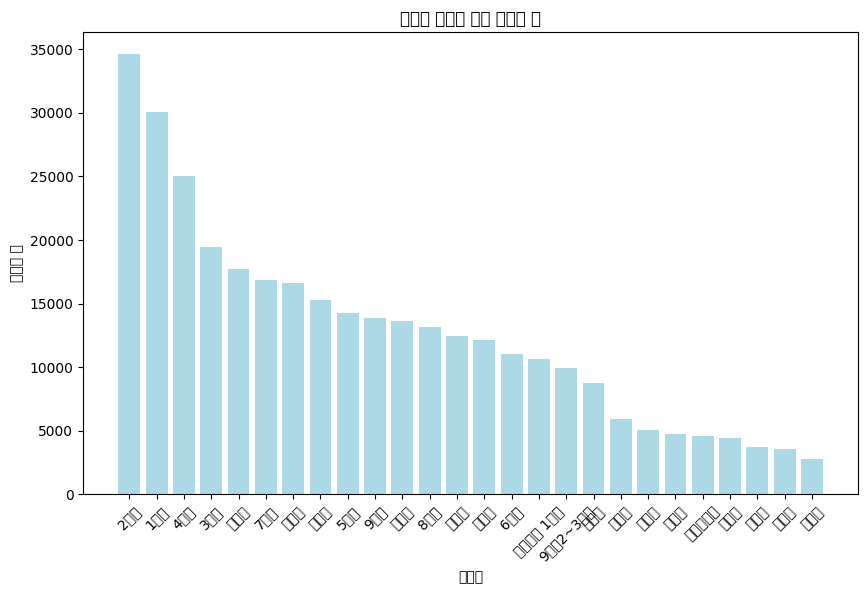

In [51]:
plt.figure(figsize=(10, 6))
p = plt.bar(csv_line.index, csv_line.values, color='lightblue')
plt.xticks(rotation=45)
plt.xlabel('호선명')
plt.ylabel('이용객 수')
plt.title('지하철 호선별 평균 이용객 수')
plt.show()

In [80]:
csv_5 = csv[(csv['호선명'] == '5호선') & (csv['사용월'] == 202305)]

In [81]:
csv_5.shape

(56, 52)

In [82]:
csv_5.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
120,202305,5호선,강동,88,0,11635,1410,20564,11995,56525,...,16615,795,7144,0,0,0,0,0,0,20230603
121,202305,5호선,강일,1,0,2779,911,9152,4301,26787,...,6063,137,1950,0,0,0,0,0,0,20230603
122,202305,5호선,개롱,11,0,3557,979,9740,4039,24471,...,6235,106,2148,0,0,0,0,0,0,20230603
123,202305,5호선,개화산,2,0,4677,535,8978,4829,22232,...,4698,142,2036,0,39,0,0,0,0,20230603
124,202305,5호선,거여,1,0,6495,813,16578,4397,50122,...,10177,214,3601,0,0,0,0,0,0,20230603


In [83]:
csv_5.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
171,202305,5호선,하남검단산,21,0,3814,12,9611,3764,23868,...,5805,122,2851,0,1,0,0,0,0,20230603
172,202305,5호선,하남시청(덕풍?신장),18,0,5715,111,12275,4456,29057,...,7406,312,3744,0,0,0,0,0,0,20230603
173,202305,5호선,하남풍산,8,2,2171,203,5741,2420,10890,...,3396,143,1513,0,0,0,0,0,0,20230603
174,202305,5호선,행당,25,2,4530,731,12572,2638,32523,...,7197,189,2261,0,0,0,0,0,0,20230603
175,202305,5호선,화곡,254,0,24552,1596,45772,10548,122264,...,30854,647,9420,0,0,0,0,0,0,20230603


In [85]:
csv_5.to_csv('sub_5.csv', index=False)

# 웹 스크래핑

In [173]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib as mpl
import matplotlib.pyplot as plt

In [157]:
url = 'https://kosis.kr/statHtml/statHtml.do?orgId=357&tblId=DT_357001_A006&vw_cd=MT_ZTITLE&list_id=357_35701_02_03&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'id': 'mainTable'})

if table:
    rows = table.find_all('tr')
    for row in rows:
        tds = row.find_all('td')
        if len(tds) >= 2:
            region = tds[0].text.strip()
            value = tds[1].text.strip()
            print("{0:<10} {1:<10}".format(region, value))
else:
    print("테이블을 찾을 수 없습니다.")

테이블을 찾을 수 없습니다.


In [166]:
import requests
from bs4 import BeautifulSoup

url = 'https://namu.wiki/w/%EC%88%98%EB%8F%84%EA%B6%8C%20%EC%A0%84%EC%B2%A0'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'table class': 'ZlY4YKpu_a5b5640faca9f1712f81cb0b01f8ea51'})

if table:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if cells:
            data = [cell.text.strip() for cell in cells]
            print(data)
else:
    print("테이블을 찾을 수 없습니다.")


테이블을 찾을 수 없습니다.


In [170]:
import requests
from bs4 import BeautifulSoup

url = 'http://www.seoulmetro.co.kr/kr/cyberStation.do#'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'id': 'stationSearchBox'})

if table:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if cells:
            data = [cell.text.strip() for cell in cells]
            print(data)
else:
    print("테이블을 찾을 수 없습니다.")

ConnectionError: ignored

In [171]:
url = 'https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'id': 'AXPage'})

if table:
    rows = table.find_all('tr')
    for row in rows:
        tds = row.find_all('td')
        if len(tds) >= 2:
            region = tds[0].text.strip()
            value = tds[1].text.strip()
            print("{0:<10} {1:<10}".format(region, value))
else:
    print("테이블을 찾을 수 없습니다.")

ConnectionError: ignored

In [178]:
import requests
from bs4 import BeautifulSoup

url = 'http://www.seoulmetro.co.kr/kr/cyberStation.do#'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'bodyNode bodyTdText'})

if table:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        if cells:
            data = [cell.text.strip() for cell in cells]
            print(data)
else:
    print("테이블을 찾을 수 없습니다.")

ConnectionError: ignored

In [177]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123 Safari/537.36'
}

response = requests.get(url, headers=headers)


In [179]:
session = requests.Session()
response = session.get(url)


ConnectionError: ignored